In [41]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import os
from torchvision.io import read_image
from PIL import Image
import torchvision.transforms as transforms

In [42]:
class FruitDataset(Dataset):
    def __init__(self, dataset_dir):
        self.DATASET_DIR = dataset_dir

        with open(f"./{dataset_dir}/fruits.txt", "r") as f:
            self.fruits = f.read().split(";")
        self.fruit_image_count = [
            len(os.listdir(f"./{dataset_dir}/{fruit}")) for fruit in self.fruits
        ]

        self.count_cumsum = [0]
        for fruit_count in self.fruit_image_count:
            self.count_cumsum.append(self.count_cumsum[-1] + fruit_count)
        
        self.tensor_transform = transforms.Compose([
            transforms.PILToTensor()
        ])
        
    def __len__(self):
        return self.count_cumsum[-1]
    
    def binsearch(self, index):
        left, right = 0, len(self.count_cumsum)
        while left <= right:
            middle_idx = left + (right - left) // 2
            middle_val = self.count_cumsum[middle_idx]

            if middle_val > index:
                right = middle_idx - 1
            elif middle_val < index:
                left = middle_idx + 1
            else:
                return middle_idx, self.count_cumsum[middle_idx] - index
        return right, self.count_cumsum[right] - index

    def __getitem__(self, index):
        fruit_idx, image_idx = self.binsearch(index)
        fruit = self.fruits[fruit_idx]
        image_name = os.listdir(f"./{self.DATASET_DIR}/{fruit}")[image_idx]
        image_path = f"{self.DATASET_DIR}/{fruit}/{image_name}"
        
        image = Image.open(image_path)
        return fruit, self.tensor_transform(image)

fruit_dataset = FruitDataset("./FIDS30")

blackberries


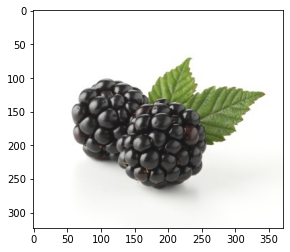

In [43]:
label, image = fruit_dataset[190]

print(label)
plt.imshow(image.permute(1, 2, 0))

In [ ]:
class VariationalAutoencoder(nn.Module):
    def __init__(self):
        super(VariationalAutoencoder, self).__init__()